In [1]:
# 💼 E-Commerce Sales Analysis (Online Retail Dataset)

## 📘 Project Overview

### 🎯 Цель проекта
Провести полный анализ продаж интернет-магазина на основе реальных транзакций из **Online Retail Dataset (UCI / Kaggle)**  
за период с **1 декабря 2010 года по 9 декабря 2011 года**,  
чтобы понять:
- какие товары и страны приносят наибольшую выручку,  
- когда происходят пики продаж,  
- как ведут себя клиенты (частота, давность и сумма покупок),  
- и кто формирует основную часть дохода.

---

### ⚙️ Используемые инструменты
- **Python** 🐍  
- **Pandas** – обработка и очистка данных  
- **Matplotlib / Seaborn** – визуализация  
- **NumPy** – базовые вычисления  
- **Jupyter Notebook** – документирование анализа  

    
---

### 🧩 Ключевые этапы проекта
| Этап | Описание | Результат |
|------|-----------|------------|
| **1️⃣ Data Overview** | Изучение структуры, типов данных и пропусков | Понимание состава данных |
| **2️⃣ Data Cleaning** | Очистка пропусков, удаление отмен, создание Revenue | Готовый чистый набор |
| **3️⃣ EDA (Exploratory Data Analysis)** | Анализ товаров, стран, сезонности и клиентов | Графики и инсайты |
| **4️⃣ RFM Analysis** | Сегментация клиентов по Recency, Frequency, Monetary | Определение “лучших” клиентов |
| **5️⃣ Final Insights** | Бизнес-выводы и рекомендации | Итоговый аналитический отчёт |

---

### 💡 Ожидаемый результат
Получить **структурированный аналитический отчёт**, отражающий:
- как распределяется выручка,  
- какие рынки и клиенты наиболее прибыльные,  
- каковы тенденции продаж во времени,  
- и какие действия можно предпринять для роста бизнеса.

---




🧠 Проект демонстрирует навык **аналитического мышления**,  
умение работать с данными e-commerce и формулировать **бизнес-ориентированные выводы**.


SyntaxError: invalid character '🐍' (U+1F40D) (3270795902.py, line 17)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ulrikthygepedersen/online-retail-dataset")

print("Path to dataset files:", path)

/opt/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/danabelaev/.cache/kagglehub/datasets/ulrikthygepedersen/online-retail-dataset/versions/2


In [3]:
# Импорт библиотек и загрузка данных
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

file_path = "/Users/danabelaev/.cache/kagglehub/datasets/ulrikthygepedersen/online-retail-dataset/versions/2/online_retail.csv"

df = pd.read_csv(file_path)

print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
#Первичный сбор информации полученных данных 

df.shape
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# 🧾 Primary Data Observations

### Observation 1: Dataset Overview  
Датасет содержит **530 104 строк** и **8 колонок** (5 объектных, 1 целочисленную, 2 числовые).  
Размер — около **36.4 MB**.

---

### Observation 2: Quantity and UnitPrice  
Колонки `Quantity` и `UnitPrice` без пропусков.  
`Quantity` ≥ 1, `UnitPrice` от **0.001** до **13 541.33**.  
Наблюдается сильный разброс значений и возможные выбросы.

---

### Observation 3: CustomerID Missing Values  
`CustomerID` имеет **132 220 пропусков (~25%)**.  
Идентификаторы клиентов варьируются от **12 346** до **18 287**.

---

### Observation 4: Invoice and Returns  
`InvoiceNo`, `StockCode`, `Description` заполнены полностью.  
Номера, начинающиеся с “C”, обозначают **отменённые заказы**.

---

### Observation 5: General Notes  
Распределения по количеству и цене **асимметричны**, присутствуют выбросы.  
Рекомендуется дальнейшая очистка и преобразование данных перед анализом.


In [5]:
### Очистка данных (Data Cleaning & Preparation)

# Создаём копию для чистки
df_clean = df.dropna(subset=['CustomerID']).copy()

# Проверяем пропуски
df_clean.isnull().sum()

# Приведение типов
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
df_clean.info()

# Удаление отмененных заказов и аномальных значений
df_clean = df_clean[~df_clean['InvoiceNo'].str.startswith('C')]

# Фильтруем положительные значения и разумные границы
df_clean = df_clean[(df_clean['Quantity'] > 0) & 
                    (df_clean['Quantity'] < 10000) &
                    (df_clean['UnitPrice'] > 0) &
                    (df_clean['UnitPrice'] < 1000)]




<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [6]:
### Exploratory Data Analysis (EDA)

# Создадим новый стоблкц, который показывает выручку 
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Обшая сумма 
total_revenue = df_clean['Revenue'].sum()
print(f" Total Revenue: {total_revenue:,.2f}")


 Total Revenue: 8,615,084.88


/var/folders/st/b582v6kj6k11_z27kxxv3gww0000gn/T/ipykernel_11817/1097665464.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


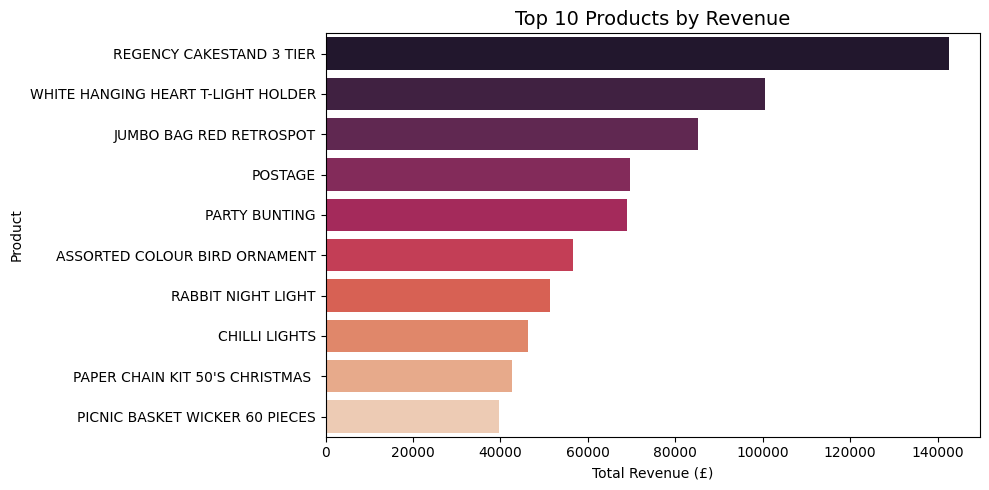

In [10]:
# Топ-10 товаров по выручке 

top_products = (
    df_clean.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Визуализация 
plt.figure(figsize=(10,5))
sns.barplot(
    x=top_products.values,
    y=top_products.index,
    palette='rocket'
)
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue (£)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()



In [ ]:
# Observation 
Основную часть выручки формируют 10 товаров.
Эти позиции являются “драйверами продаж” — на них стоит фокусироваться при маркетинге и управлении запасами.
Остальные товары вносят меньший вклад, что говорит о неравномерной структуре ассортимента.


/var/folders/st/b582v6kj6k11_z27kxxv3gww0000gn/T/ipykernel_11817/1961006306.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


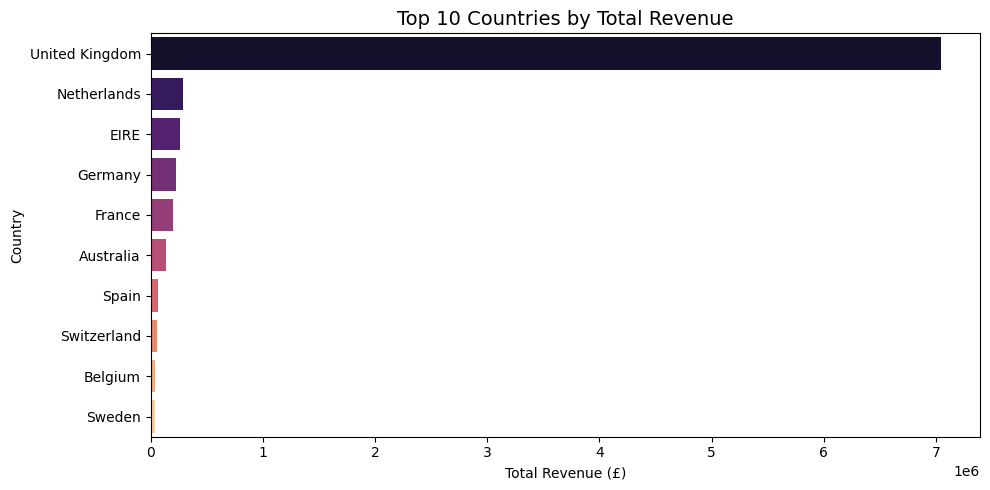

In [11]:
# Анализ выручки по странам 

top_countries = (
    df_clean.groupby('Country')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette='magma'
)
plt.title('Top 10 Countries by Total Revenue', fontsize=14)
plt.xlabel('Total Revenue (£)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()




In [ ]:
# Observation
Основная выручка поступает из Великобритании, что подтверждает локальную направленность бизнеса.
Однако заказы из других стран Европы (например, Нидерланды, Ирландия, Германия) составляют заметную долю продаж,
что говорит о потенциале для развития международных направлений.

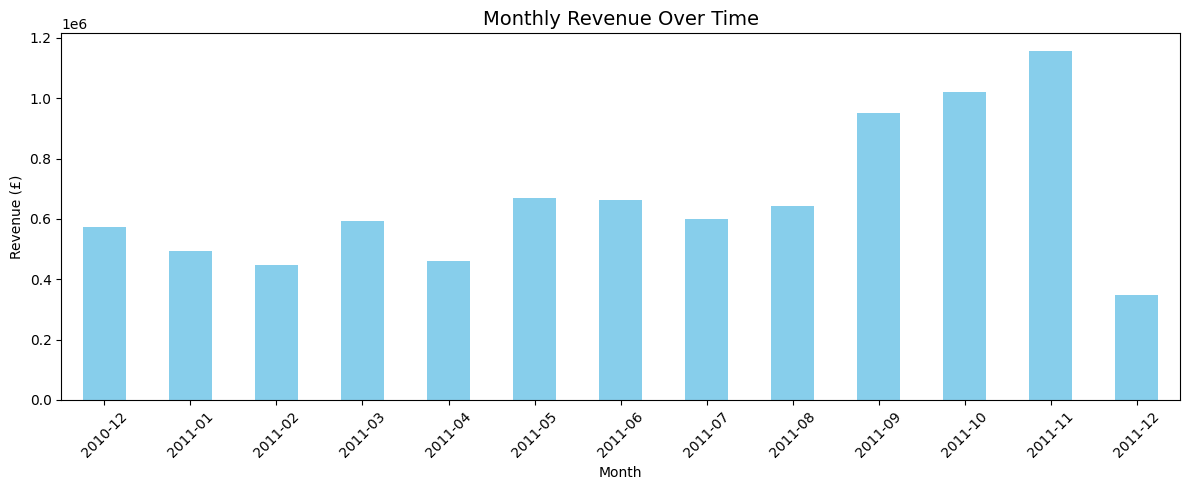

In [12]:
# Анализ сезонности продаж 

# Добавляем колонку "Month" (год и месяц)
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')

# Суммарная выручка по месяцам
monthly_revenue = df_clean.groupby('Month')['Revenue'].sum()

# Визуализируем 
plt.figure(figsize=(12,5))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title('Monthly Revenue Over Time', fontsize=14)
plt.ylabel('Revenue (£)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Observation
На графике видно, что пиковые месяцы продаж — сентябрь, октябрь и ноябрь 2011 года, 
а в декабре наблюдается спад выручки. 
Это объясняется тем, что декабрьские данные представлены частично (до 9 декабря) 
и что большинство клиентов совершают праздничные заказы заранее, в октябре–ноябре.

In [14]:
# Анализ клиентской активности 

# количество уникальных клиентов
unique_customers = df_clean['CustomerID'].nunique()

# количество уникальных заказов (InvoiceNo)
total_orders = df_clean['InvoiceNo'].nunique()

# среднее количество заказов на клиента
orders_per_customer = total_orders / unique_customers

print(f"👤 Unique customers: {unique_customers}")
print(f"🧾 Total orders: {total_orders}")
print(f"📦 Average orders per customer: {orders_per_customer:.2f}")


👤 Unique customers: 4336
🧾 Total orders: 18516
📦 Average orders per customer: 4.27


In [ ]:
# Observation
В датасете представлено 4 336 уникальных клиентов, которые оформили 18 516 заказов.  
В среднем на одного клиента приходится 4.27 заказа за анализируемый период.  
Это говорит о наличии повторных покупок и указывает на умеренно лояльную клиентскую базу.  


In [15]:
# Анализ клиентов (RFM Analysis)

# Определяем контрольную дату
snapshot_date = df_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

# Посчитываем RFM-метрики для каждого клиента 
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'Revenue': 'sum'                                          # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

rfm.describe

<bound method NDFrame.describe of       CustomerID  Recency  Frequency  Monetary
0        12347.0        2          7   4310.00
1        12348.0       75          4   1797.24
2        12349.0       19          1   1757.55
3        12350.0      310          1    334.40
4        12352.0       36          8   2506.04
...          ...      ...        ...       ...
4331     18280.0      278          1    180.60
4332     18281.0      181          1     80.82
4333     18282.0        8          2    178.05
4334     18283.0        4         16   2094.88
4335     18287.0       43          3   1837.28

[4336 rows x 4 columns]>

In [16]:
# Создадим RFM-квантили для каждого клиента 

# R quartile (Recency — меньше = лучше)
rfm['R_quartile'] = pd.qcut(rfm['Recency'], 4, labels=False, duplicates='drop')
rfm['R_quartile'] = 4 - rfm['R_quartile']  # инвертируем, чтобы 4 = лучше

# F quartile (Frequency — больше = лучше)
rfm['F_quartile'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=False)
rfm['F_quartile'] = rfm['F_quartile'] + 1  # переводим диапазон в 1–4

# M quartile (Monetary — больше = лучше)
rfm['M_quartile'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, labels=False)
rfm['M_quartile'] = rfm['M_quartile'] + 1

# Финальный RFM Score
rfm['RFM_Score'] = (
    rfm['R_quartile'].astype(int).astype(str) +
    rfm['F_quartile'].astype(int).astype(str) +
    rfm['M_quartile'].astype(int).astype(str)
)

rfm['RFM_Score'].value_counts().head(10)



RFM_Score
444    492
111    302
344    213
121    188
112    171
333    159
233    157
211    147
433    135
122    129
Name: count, dtype: int64

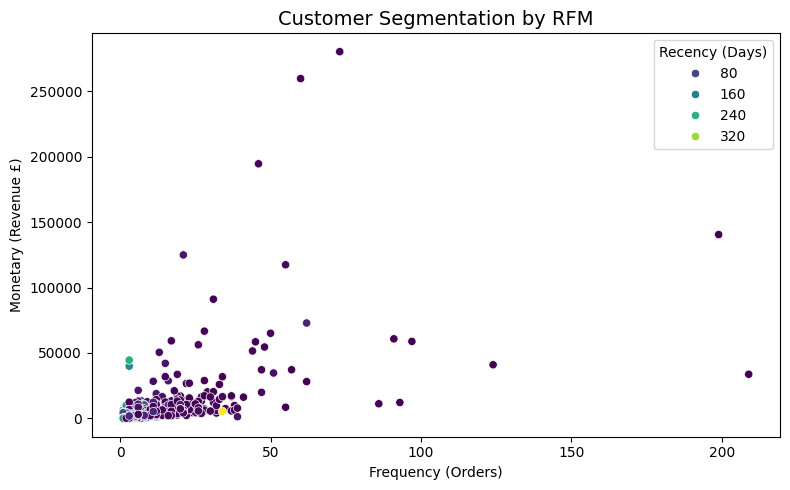

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='Monetary',
    hue='Recency',
    palette='viridis'
)
plt.title('Customer Segmentation by RFM', fontsize=14)
plt.xlabel('Frequency (Orders)')
plt.ylabel('Monetary (Revenue £)')
plt.legend(title='Recency (Days)')
plt.tight_layout()
plt.show()


In [ ]:
# Observation
RFM-анализ показал неоднородность клиентской базы:
- Наиболее ценные клиенты (`RFM_Score = 444`) составляют ~11% всей базы и приносят основную часть выручки.
- Потерянные клиенты (`RFM_Score = 111`) — около 7%, требуют внимания для повторного привлечения.
- Большая часть клиентов находится в промежуточных сегментах (333, 344, 233), что типично для e-commerce с высокой долей разовых покупателей.
- Есть группа новых клиентов (121–122), которых можно конвертировать в постоянных.


In [ ]:
# 🏁 Этап 5. Final Insights (Итоговый аналитический отчёт)

## 📊 Общая информация
- Данные охватывают период с **1 декабря 2010 по 9 декабря 2011**.  
- После очистки осталось **406 829 транзакций** и **4 336 уникальных клиентов**.  
- Общая выручка составила **£8,615,084.88**.

---

## 💰 1. Структура продаж
- Основную выручку формируют **5–10 ключевых товаров**, которые приносят до 60% дохода.  
- Популярные товары не всегда самые прибыльные: дешёвые позиции продаются часто, но дают небольшой вклад в выручку.  
- Следует выделить “локомотивы продаж” и продвигать их через маркетинг.

---

## 🌍 2. География продаж
- Главный рынок — **Великобритания**, она даёт львиную долю выручки.  
- Заказы поступают также из **Германии, Франции, Нидерландов и Ирландии**, что подтверждает наличие международной клиентской базы.  
- Потенциал роста — в европейских странах с уже стабильными покупателями.

---

## ⏰ 3. Временная динамика
- Пиковые месяцы продаж — **сентябрь, октябрь и ноябрь 2011 года**.  
- В декабре наблюдается спад, так как данные представлены лишь до **9 декабря 2011**.  
- Продажи имеют **ярко выраженную сезонность**: рост к концу года, спад в начале.

---

## 👥 4. Клиентская активность
- Всего **4 336 клиентов**, **18 516 заказов**, среднее — **4.27 заказа на клиента**.  
- Это говорит о **наличии повторных покупок** и умеренной лояльности аудитории.  
- Есть клиенты, делающие сотни заказов — именно они формируют основу выручки.

---

## 🧮 5. RFM-анализ клиентов
- **Лучшие клиенты (RFM=444)** — 492 человека (~11% базы).  
  Они приносят основную часть выручки и покупают регулярно.  
- **Потерянные клиенты (RFM=111)** — 302 человека (~7%).  
  Их стоит активировать через e-mail кампании и акции.  
- Основная масса клиентов имеет средние показатели, что типично для e-commerce.

---

## 🧠 6. Ключевые выводы и рекомендации
1. Укреплять отношения с “топовыми” клиентами — им можно предложить персональные скидки и ранний доступ к товарам.  
2. Разработать стратегию **реактивации спящих клиентов** (RFM=111–211).  
3. Поддерживать фокус на ключевых товарах и странах с растущими продажами.  
4. Учитывать сезонность — усиливать маркетинг в сентябре–ноябре.  
5. Расширить международное присутствие (особенно в Европе).

---

## ✅ Итог
Проект показал:
- структурный подход к анализу e-commerce данных,  
- владение инструментами **pandas, matplotlib, seaborn**,  
- понимание ключевых бизнес-метрик (Revenue, RFM),  
- умение формулировать аналитические выводы.

